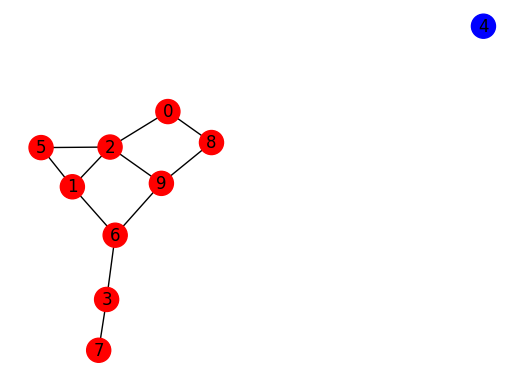

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# グラフの作成
G = nx.erdos_renyi_graph(n=10, p=0.2, seed=42)

# ノード属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # 状態を0または1に初期化

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # 自身は除く
    return list(markov_blanket)

def update_state(G, node):
    markov_blanket = get_markov_blanket(G, node)
    states = [G.nodes[neighbor]['state'] for neighbor in markov_blanket]
    if len(states) > 0:
        G.nodes[node]['state'] = np.random.choice(states)  # ブランケット内の状態に基づき更新

# シミュレーションの実行
iterations = 10
for _ in range(iterations):
    for node in G.nodes:
        update_state(G, node)

# 結果の可視化
node_colors = ['red' if G.nodes[node]['state'] == 1 else 'blue' for node in G.nodes]
pos = nx.spring_layout(G, seed=42)

# 描画の調整
plt.figure()  # 新しい図を作成
ax = plt.gca()  # 現在の軸を取得
nx.draw(G, pos, node_color=node_colors, with_labels=True, ax=ax)  # 指定した軸に描画
plt.show()

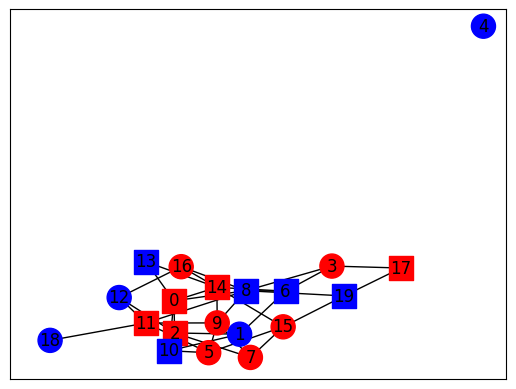

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# グラフの作成
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# ノード属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # 状態を0または1に初期化
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # 内部ノードと外部ノードにランダムに分ける

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # 自身は除く
    return list(markov_blanket)

def update_state(G, node):
    markov_blanket = get_markov_blanket(G, node)
    states = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external']
    if len(states) > 0:
        if G.nodes[node]['type'] == 'internal':
            # 内部ノードは外部ノードの状態に基づいて感知
            G.nodes[node]['state'] = np.random.choice(states)
        elif G.nodes[node]['type'] == 'external':
            # 外部ノードは内部ノードに影響を与える（ここでは簡略化してランダムな影響を与える）
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal':
                    G.nodes[neighbor]['state'] = np.random.choice(states)

# シミュレーションの実行
iterations = 10
for _ in range(iterations):
    for node in G.nodes:
        update_state(G, node)

# 結果の可視化
node_colors = ['red' if G.nodes[node]['state'] == 1 else 'blue' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]
pos = nx.spring_layout(G, seed=42)

# 描画の調整
plt.figure()  # 新しい図を作成
ax = plt.gca()  # 現在の軸を取得
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

ノード 16 が崩壊しました。
ノード 17 が崩壊しました。
ノード 4 が崩壊しました。
ノード 9 が崩壊しました。
ノード 13 が崩壊しました。
ノード 2 が崩壊しました。
ノード 1 が崩壊しました。
ノード 15 が崩壊しました。
ノード 7 が崩壊しました。


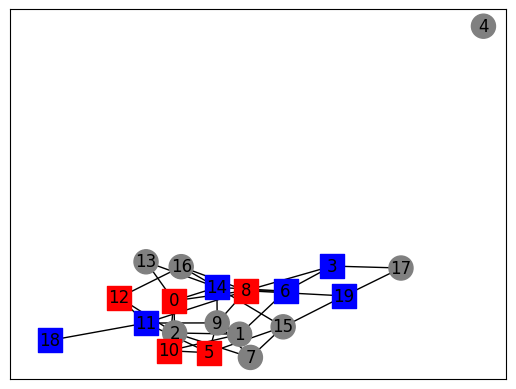

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# グラフの作成
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# ノード属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # 状態を0または1に初期化
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # 内部ノードと外部ノードにランダムに分ける
    G.nodes[node]['alive'] = True  # ノードの生存状態を追加

# 体内環境の初期化
internal_environment = {
    'energy': 100,  # エネルギーレベル
    'hydration': 100,  # 水分レベル
    'nutrients': 100  # 栄養レベル
}
threshold = 20  # 組織崩壊の閾値

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # 自身は除く
    return list(markov_blanket)

def update_state(G, node, internal_environment):
    if not G.nodes[node]['alive']:
        return  # ノードが死んでいる場合は更新しない
    markov_blanket = get_markov_blanket(G, node)
    states = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(states) > 0:
        if G.nodes[node]['type'] == 'internal':
            # 内部ノードは外部ノードの状態に基づいて感知
            G.nodes[node]['state'] = np.random.choice(states)
        elif G.nodes[node]['type'] == 'external':
            # 外部ノードは内部ノードに影響を与える（ここでは簡略化してランダムな影響を与える）
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(states)

def decrement_internal_environment(internal_environment):
    # 時間とともに体内環境パラメータを減少させる
    internal_environment['energy'] -= 1
    internal_environment['hydration'] -= 1
    internal_environment['nutrients'] -= 1

def check_environment_and_update_nodes(G, internal_environment):
    if any(value < threshold for value in internal_environment.values()):
        # 体内環境が閾値以下の場合、ランダムに内部ノードを崩壊させる
        internal_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']]
        if internal_nodes:
            node_to_kill = np.random.choice(internal_nodes)
            G.nodes[node_to_kill]['alive'] = False
            print(f"ノード {node_to_kill} が崩壊しました。")

# シミュレーションの実行
iterations = 100  # シミュレーションの回数
for t in range(iterations):
    for node in G.nodes:
        update_state(G, node, internal_environment)
    decrement_internal_environment(internal_environment)
    check_environment_and_update_nodes(G, internal_environment)

# 結果の可視化
node_colors = ['red' if G.nodes[node]['state'] == 1 and G.nodes[node]['alive'] else 'blue' if G.nodes[node]['alive'] else 'gray' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]
pos = nx.spring_layout(G, seed=42)

# 描画の調整
plt.figure()  # 新しい図を作成
ax = plt.gca()  # 現在の軸を取得
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# グラフの作成
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# ノード属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # 状態を0または1に初期化
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # 内部ノードと外部ノードにランダムに分ける
    G.nodes[node]['alive'] = True  # ノードの生存状態を追加

# ノードの位置を計算
pos = nx.spring_layout(G, seed=42)

# エネルギー源の設定（特定の地域内にランダムに配置）
def set_energy_source(G, pos, region_center, region_radius):
    possible_nodes = [node for node in G.nodes if np.linalg.norm(pos[node] - region_center) <= region_radius]
    if not possible_nodes:
        raise ValueError("指定された地域内にノードが存在しません。")
    return np.random.choice(possible_nodes)

region_center = np.array([0.5, 0.5])
region_radius = 0.2
energy_source = set_energy_source(G, pos, region_center, region_radius)

# シミュレーションのパラメータ
initial_energy = 1000  # 組織全体の初期エネルギー
organization_energy = initial_energy  # 組織全体のエネルギー
threshold = 200  # 組織崩壊の閾値
energy_boost = 200  # エネルギー補給量
energy_radius = 2  # エネルギー源からの距離
decrement_rate = 10  # エネルギーの減少率

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # 自身は除く
    return list(markov_blanket)

def update_state(G, node):
    if not G.nodes[node]['alive']:
        return  # ノードが死んでいる場合は更新しない
    markov_blanket = get_markov_blanket(G, node)
    external_info = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(external_info) > 0:
        if G.nodes[node]['type'] == 'internal':
            # 内部ノードは外部ノードの情報を基に状態を更新
            G.nodes[node]['state'] = np.random.choice(external_info)
        elif G.nodes[node]['type'] == 'external':
            # 外部ノードは内部ノードに影響を与える
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(external_info)

def decrement_energy():
    global organization_energy
    organization_energy -= decrement_rate
    if organization_energy <= threshold:
        print(f"組織のエネルギーが閾値を下回りました。エネルギー: {organization_energy}")
        return False
    return True

def replenish_energy(G, energy_source, energy_radius):
    global organization_energy
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']:
            if nx.shortest_path_length(G, source=node, target=energy_source) <= energy_radius:
                organization_energy += energy_boost
                print(f"ノード {node} がエネルギー源 {energy_source} からエネルギーを補給しました。現在の組織エネルギー: {organization_energy}")

def estimate_energy_source(G, internal_node):
    markov_blanket = get_markov_blanket(G, internal_node)
    external_info = [neighbor for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if not external_info:
        return None
    # 外部ノードの位置を基にエネルギー源の推測
    external_positions = [pos[neighbor] for neighbor in external_info]
    estimated_position = np.mean(external_positions, axis=0)
    # 最も近いノードをエネルギー源として推測
    closest_node = min(G.nodes, key=lambda node: np.linalg.norm(pos[node] - estimated_position))
    return closest_node

def move_towards_estimated_source(G, internal_node, estimated_source):
    if estimated_source and G.nodes[internal_node]['alive']:
        path = nx.shortest_path(G, source=internal_node, target=estimated_source)
        if len(path) > 1:
            next_node = path[1]
            pos[internal_node] = pos[next_node]  # ノードを移動させる（簡略化）

# シミュレーションの実行
iterations = 100  # シミュレーションの回数
for t in range(iterations):
    for node in G.nodes:
        update_state(G, node)
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal':
            estimated_source = estimate_energy_source(G, node)
            move_towards_estimated_source(G, node, estimated_source)
    if not decrement_energy():
        print("組織が崩壊しました。")
        break
    replenish_energy(G, energy_source, energy_radius)

# 結果の可視化
node_colors = ['red' if G.nodes[node]['state'] == 1 and G.nodes[node]['alive'] else 'blue' if G.nodes[node]['alive'] else 'gray' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]

# エネルギー源の可視化
nx.draw_networkx_nodes(G, pos, nodelist=[energy_source], node_color='green', node_shape='p', node_size=500, label='Energy Source')

# 描画の調整
plt.figure()  # 新しい図を作成
ax = plt.gca()  # 現在の軸を取得
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

ValueError: 指定された地域内にノードが存在しません。

In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# グラフの作成
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# ノード属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # 状態を0または1に初期化
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # 内部ノードと外部ノードにランダムに分ける
    G.nodes[node]['alive'] = True  # ノードの生存状態を追加

# ノードの位置を計算
pos = nx.spring_layout(G, seed=42)

# エネルギー源の設定（特定の地域内にランダムに配置）
def set_energy_source(G, pos, region_center, region_radius):
    possible_nodes = [node for node in G.nodes if np.linalg.norm(pos[node] - region_center) <= region_radius]
    if not possible_nodes:
        return None
    return np.random.choice(possible_nodes)

# エネルギー源の設定を複数回試行
def find_energy_source(G, pos, region_center, initial_radius, max_attempts):
    radius_increment = 0.1
    for attempt in range(max_attempts):
        energy_source = set_energy_source(G, pos, region_center, initial_radius + attempt * radius_increment)
        if energy_source is not None:
            return energy_source
    return None

region_center = np.array([0.5, 0.5])
initial_radius = 0.2
max_attempts = 10
energy_source = find_energy_source(G, pos, region_center, initial_radius, max_attempts)
if energy_source is None:
    raise ValueError("指定された地域内にエネルギー源を設定できませんでした。")

# シミュレーションのパラメータ
initial_energy = 1000  # 組織全体の初期エネルギー
organization_energy = initial_energy  # 組織全体のエネルギー
threshold = 200  # 組織崩壊の閾値
energy_boost = 200  # エネルギー補給量
energy_radius = 2  # エネルギー源からの距離
decrement_rate = 10  # エネルギーの減少率

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # 自身は除く
    return list(markov_blanket)

def update_state(G, node):
    if not G.nodes[node]['alive']:
        return  # ノードが死んでいる場合は更新しない
    markov_blanket = get_markov_blanket(G, node)
    external_info = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(external_info) > 0:
        if G.nodes[node]['type'] == 'internal':
            # 内部ノードは外部ノードの情報を基に状態を更新
            G.nodes[node]['state'] = np.random.choice(external_info)
        elif G.nodes[node]['type'] == 'external':
            # 外部ノードは内部ノードに影響を与える
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(external_info)

def decrement_energy():
    global organization_energy
    organization_energy -= decrement_rate
    if organization_energy <= threshold:
        print(f"組織のエネルギーが閾値を下回りました。エネルギー: {organization_energy}")
        return False
    return True

def replenish_energy(G, energy_source, energy_radius):
    global organization_energy
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']:
            if nx.shortest_path_length(G, source=node, target=energy_source) <= energy_radius:
                organization_energy += energy_boost
                print(f"ノード {node} がエネルギー源 {energy_source} からエネルギーを補給しました。現在の組織エネルギー: {organization_energy}")

def estimate_energy_source(G, internal_node):
    markov_blanket = get_markov_blanket(G, internal_node)
    external_info = [neighbor for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if not external_info:
        return None
    # 外部ノードの位置を基にエネルギー源の推測
    external_positions = [pos[neighbor] for neighbor in external_info]
    estimated_position = np.mean(external_positions, axis=0)
    # 最も近いノードをエネルギー源として推測
    closest_node = min(G.nodes, key=lambda node: np.linalg.norm(pos[node] - estimated_position))
    return closest_node

def move_towards_estimated_source(G, internal_node, estimated_source):
    if estimated_source and G.nodes[internal_node]['alive']:
        path = nx.shortest_path(G, source=internal_node, target=estimated_source)
        if len(path) > 1:
            next_node = path[1]
            pos[internal_node] = pos[next_node]  # ノードを移動させる（簡略化）

# シミュレーションの実行
iterations = 100  # シミュレーションの回数
for t in range(iterations):
    for node in G.nodes:
        update_state(G, node)
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal':
            estimated_source = estimate_energy_source(G, node)
            move_towards_estimated_source(G, node, estimated_source)
    if not decrement_energy():
        print("組織が崩壊しました。")
        break
    replenish_energy(G, energy_source, energy_radius)

# 結果の可視化
node_colors = ['red' if G.nodes[node]['state'] == 1 and G.nodes[node]['alive'] else 'blue' if G.nodes[node]['alive'] else 'gray' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]

# エネルギー源の可視化
nx.draw_networkx_nodes(G, pos, nodelist=[energy_source], node_color='green', node_shape='p', node_size=500, label='Energy Source')

# 描画の調整
plt.figure()  # 新しい図を作成
ax = plt.gca()  # 現在の軸を取得
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

ノード 3 がエネルギー源 17 からエネルギーを補給しました。現在の組織エネルギー: 1190


NetworkXNoPath: No path between 4 and 17.

ノード 0 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 1190
ノード 3 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 1390
ノード 6 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 1590
ノード 9 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 1790
ノード 14 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 1990
ノード 0 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 2180
ノード 3 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 2380
ノード 6 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 2580
ノード 9 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 2780
ノード 14 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 2980
ノード 0 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 3170
ノード 3 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 3370
ノード 6 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 3570
ノード 9 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 3770
ノード 14 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 3970
ノード 0 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 4160
ノード 3 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 4360
ノード 6 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 4560
ノード 9 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 4760
ノード 14 がエネルギー源 3 からエネルギーを補給しました。現在の組織エネルギー: 4960
ノード 0 がエネルギー源 3 からエネルギーを補給しました。現在の組織

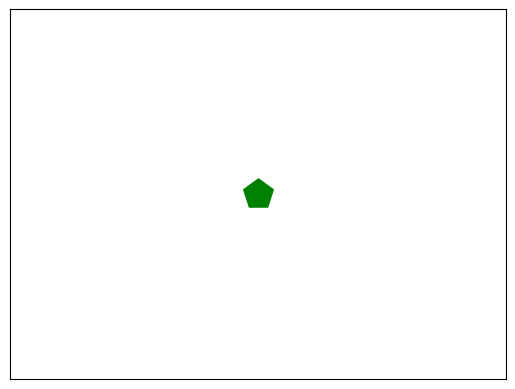

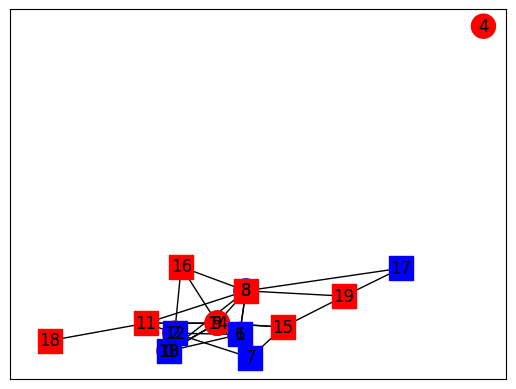

In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# グラフの作成
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# ノード属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = np.random.choice([0, 1])  # 状態を0または1に初期化
    G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # 内部ノードと外部ノードにランダムに分ける
    G.nodes[node]['alive'] = True  # ノードの生存状態を追加

# ノードの位置を計算
pos = nx.spring_layout(G, seed=42)

# エネルギー源の設定（特定の地域内にランダムに配置）
def set_energy_source(G, pos, region_center, region_radius):
    possible_nodes = [node for node in G.nodes if np.linalg.norm(pos[node] - region_center) <= region_radius]
    if not possible_nodes:
        return None
    return np.random.choice(possible_nodes)

# エネルギー源の設定を複数回試行
def find_energy_source(G, pos, region_center, initial_radius, max_attempts):
    radius_increment = 0.1
    for attempt in range(max_attempts):
        energy_source = set_energy_source(G, pos, region_center, initial_radius + attempt * radius_increment)
        if energy_source is not None:
            return energy_source
    return None

region_center = np.array([0.5, 0.5])
initial_radius = 0.2
max_attempts = 10
energy_source = find_energy_source(G, pos, region_center, initial_radius, max_attempts)
if energy_source is None:
    raise ValueError("指定された地域内にエネルギー源を設定できませんでした。")

# シミュレーションのパラメータ
initial_energy = 1000  # 組織全体の初期エネルギー
organization_energy = initial_energy  # 組織全体のエネルギー
threshold = 200  # 組織崩壊の閾値
energy_boost = 200  # エネルギー補給量
energy_radius = 2  # エネルギー源からの距離
decrement_rate = 10  # エネルギーの減少率

def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # 自身は除く
    return list(markov_blanket)

def update_state(G, node):
    if not G.nodes[node]['alive']:
        return  # ノードが死んでいる場合は更新しない
    markov_blanket = get_markov_blanket(G, node)
    external_info = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(external_info) > 0:
        if G.nodes[node]['type'] == 'internal':
            # 内部ノードは外部ノードの情報を基に状態を更新
            G.nodes[node]['state'] = np.random.choice(external_info)
        elif G.nodes[node]['type'] == 'external':
            # 外部ノードは内部ノードに影響を与える
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(external_info)

def decrement_energy():
    global organization_energy
    organization_energy -= decrement_rate
    if organization_energy <= threshold:
        print(f"組織のエネルギーが閾値を下回りました。エネルギー: {organization_energy}")
        return False
    return True

def replenish_energy(G, energy_source, energy_radius):
    global organization_energy
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']:
            if nx.has_path(G, node, energy_source) and nx.shortest_path_length(G, source=node, target=energy_source) <= energy_radius:
                organization_energy += energy_boost
                print(f"ノード {node} がエネルギー源 {energy_source} からエネルギーを補給しました。現在の組織エネルギー: {organization_energy}")

def estimate_energy_source(G, internal_node):
    markov_blanket = get_markov_blanket(G, internal_node)
    external_info = [neighbor for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if not external_info:
        return None
    # 外部ノードの位置を基にエネルギー源の推測
    external_positions = [pos[neighbor] for neighbor in external_info]
    estimated_position = np.mean(external_positions, axis=0)
    # 最も近いノードをエネルギー源として推測
    closest_node = min(G.nodes, key=lambda node: np.linalg.norm(pos[node] - estimated_position))
    return closest_node

def move_towards_estimated_source(G, internal_node, estimated_source):
    if estimated_source and G.nodes[internal_node]['alive']:
        if nx.has_path(G, internal_node, estimated_source):
            path = nx.shortest_path(G, source=internal_node, target=estimated_source)
            if len(path) > 1:
                next_node = path[1]
                pos[internal_node] = pos[next_node]  # ノードを移動させる（簡略化）

# シミュレーションの実行
iterations = 100  # シミュレーションの回数
for t in range(iterations):
    for node in G.nodes:
        update_state(G, node)
    for node in G.nodes:
        if G.nodes[node]['type'] == 'internal':
            estimated_source = estimate_energy_source(G, node)
            move_towards_estimated_source(G, node, estimated_source)
    if not decrement_energy():
        print("組織が崩壊しました。")
        break
    replenish_energy(G, energy_source, energy_radius)

# 結果の可視化
node_colors = ['red' if G.nodes[node]['state'] == 1 and G.nodes[node]['alive'] else 'blue' if G.nodes[node]['alive'] else 'gray' for node in G.nodes]
node_shapes = ['o' if G.nodes[node]['type'] == 'internal' else 's' for node in G.nodes]

# エネルギー源の可視化
nx.draw_networkx_nodes(G, pos, nodelist=[energy_source], node_color='green', node_shape='p', node_size=500, label='Energy Source')

# 描画の調整
plt.figure()  # 新しい図を作成
ax = plt.gca()  # 現在の軸を取得
for shape in set(node_shapes):
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                           node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# グラフの作成
def create_organization(G, num_nodes):
    nodes = list(G.nodes)[:num_nodes]
    subgraph = G.subgraph(nodes).copy()
    return subgraph

# ノード属性の初期化
def initialize_nodes(G):
    for node in G.nodes:
        G.nodes[node]['state'] = np.random.choice([0, 1])  # 状態を0または1に初期化
        G.nodes[node]['type'] = 'internal' if np.random.rand() > 0.5 else 'external'  # 内部ノードと外部ノードにランダムに分ける
        G.nodes[node]['alive'] = True  # ノードの生存状態を追加

# エネルギー源の設定（特定の地域内にランダムに配置）
def set_energy_source(G, pos, region_center, region_radius):
    possible_nodes = [node for node in G.nodes if np.linalg.norm(pos[node] - region_center) <= region_radius]
    if not possible_nodes:
        return None
    return np.random.choice(possible_nodes)

# エネルギー源の設定を複数回試行
def find_energy_source(G, pos, region_center, initial_radius, max_attempts):
    radius_increment = 0.1
    for attempt in range(max_attempts):
        energy_source = set_energy_source(G, pos, region_center, initial_radius + attempt * radius_increment)
        if energy_source is not None:
            return energy_source
    return None

# シミュレーションパラメータの設定
initial_energy = 1000  # 組織全体の初期エネルギー
threshold = 200  # 組織崩壊の閾値
energy_boost = 200  # エネルギー補給量
energy_radius = 2  # エネルギー源からの距離
decrement_rate = 10  # エネルギーの減少率

# マルコフブランケットを取得
def get_markov_blanket(G, node):
    neighbors = list(G.neighbors(node))
    markov_blanket = neighbors[:]
    for neighbor in neighbors:
        markov_blanket.extend(list(G.neighbors(neighbor)))
    markov_blanket = set(markov_blanket)
    markov_blanket.discard(node)  # 自身は除く
    return list(markov_blanket)

# 組織の状態を更新
def update_state(G, node):
    if not G.nodes[node]['alive']:
        return  # ノードが死んでいる場合は更新しない
    markov_blanket = get_markov_blanket(G, node)
    external_info = [G.nodes[neighbor]['state'] for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if len(external_info) > 0:
        if G.nodes[node]['type'] == 'internal':
            # 内部ノードは外部ノードの情報を基に状態を更新
            G.nodes[node]['state'] = np.random.choice(external_info)
        elif G.nodes[node]['type'] == 'external':
            # 外部ノードは内部ノードに影響を与える
            for neighbor in markov_blanket:
                if G.nodes[neighbor]['type'] == 'internal' and G.nodes[neighbor]['alive']:
                    G.nodes[neighbor]['state'] = np.random.choice(external_info)

# 組織のエネルギーを減少させる
def decrement_energy(organization_energy):
    organization_energy -= decrement_rate
    if organization_energy <= threshold:
        print(f"組織のエネルギーが閾値を下回りました。エネルギー: {organization_energy}")
        return False, organization_energy
    return True, organization_energy

# 組織のエネルギーを補給する
def replenish_energy(G, energy_source, energy_radius, organization_energy):
    internal_nodes = [node for node in G.nodes if G.nodes[node]['type'] == 'internal' and G.nodes[node]['alive']]
    for node in internal_nodes:
        if nx.has_path(G, node, energy_source) and nx.shortest_path_length(G, source=node, target=energy_source) <= energy_radius:
            organization_energy += energy_boost
            print(f"組織がエネルギー源 {energy_source} からエネルギーを補給しました。現在の組織エネルギー: {organization_energy}")
            return organization_energy
    return organization_energy

# エネルギー源を推測する
def estimate_energy_source(G, internal_node, pos):
    markov_blanket = get_markov_blanket(G, internal_node)
    external_info = [neighbor for neighbor in markov_blanket if G.nodes[neighbor]['type'] == 'external' and G.nodes[neighbor]['alive']]
    if not external_info:
        return None
    # 外部ノードの位置を基にエネルギー源の推測
    external_positions = [pos[neighbor] for neighbor in external_info]
    estimated_position = np.mean(external_positions, axis=0)
    # 最も近いノードをエネルギー源として推測
    closest_node = min(G.nodes, key=lambda node: np.linalg.norm(pos[node] - estimated_position))
    return closest_node

# エネルギー源に向かって移動
def move_towards_estimated_source(G, internal_node, estimated_source, pos):
    if estimated_source and G.nodes[internal_node]['alive']:
        if nx.has_path(G, internal_node, estimated_source):
            path = nx.shortest_path(G, source=internal_node, target=estimated_source)
            if len(path) > 1:
                next_node = path[1]
                pos[internal_node] = pos[next_node]  # ノードを移動させる（簡略化）

# メインロジック
G = nx.erdos_renyi_graph(n=100, p=0.05, seed=42)
pos = nx.spring_layout(G, seed=42)

# 組織の生成
num_organizations = 5
organizations = []
for _ in range(num_organizations):
    organization = create_organization(G, 20)
    initialize_nodes(organization)
    organizations.append(organization)

region_center = np.array([0.5, 0.5])
initial_radius = 0.2
max_attempts = 10
energy_source = find_energy_source(G, pos, region_center, initial_radius, max_attempts)
if energy_source is None:
    raise ValueError("指定された地域内にエネルギー源を設定できませんでした。")

# シミュレーションの実行
iterations = 100  # シミュレーションの回数
for t in range(iterations):
    for organization in organizations:
        for node in organization.nodes:
            update_state(organization, node)
        for node in organization.nodes:
            if organization.nodes[node]['type'] == 'internal':
                estimated_source = estimate_energy_source(organization, node, pos)
                move_towards_estimated_source(organization, node, estimated_source, pos)
        alive, organization_energy = decrement_energy(initial_energy)
        if not alive:
            print("組織が崩壊しました。")
            organizations.remove(organization)
        organization_energy = replenish_energy(organization, energy_source, energy_radius, initial_energy)
        if not organizations:
            break

# 結果の可視化
for organization in organizations:
    node_colors = ['red' if organization.nodes[node]['state'] == 1 and organization.nodes[node]['alive'] else 'blue' if organization.nodes[node]['alive'] else 'gray' for node in organization.nodes]
    node_shapes = ['o' if organization.nodes[node]['type'] == 'internal' else 's' for node in organization.nodes]

    # エネルギー源の可視化
    nx.draw_networkx_nodes(G, pos, nodelist=[energy_source], node_color='green', node_shape='p', node_size=500, label='Energy Source')

    # 描画の調整
    plt.figure()  # 新しい図を作成
    ax = plt.gca()  # 現在の軸を取得
    for shape in set(node_shapes):
        nx.draw_networkx_nodes(G, pos, node_color=[node_colors[i] for i in range(len(node_shapes)) if node_shapes[i] == shape],
                               node_shape=shape, nodelist=[i for i in range(len(node_shapes)) if node_shapes[i] == shape], ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
plt.show()

NodeNotFound: Either source 1 or target 33 is not in G

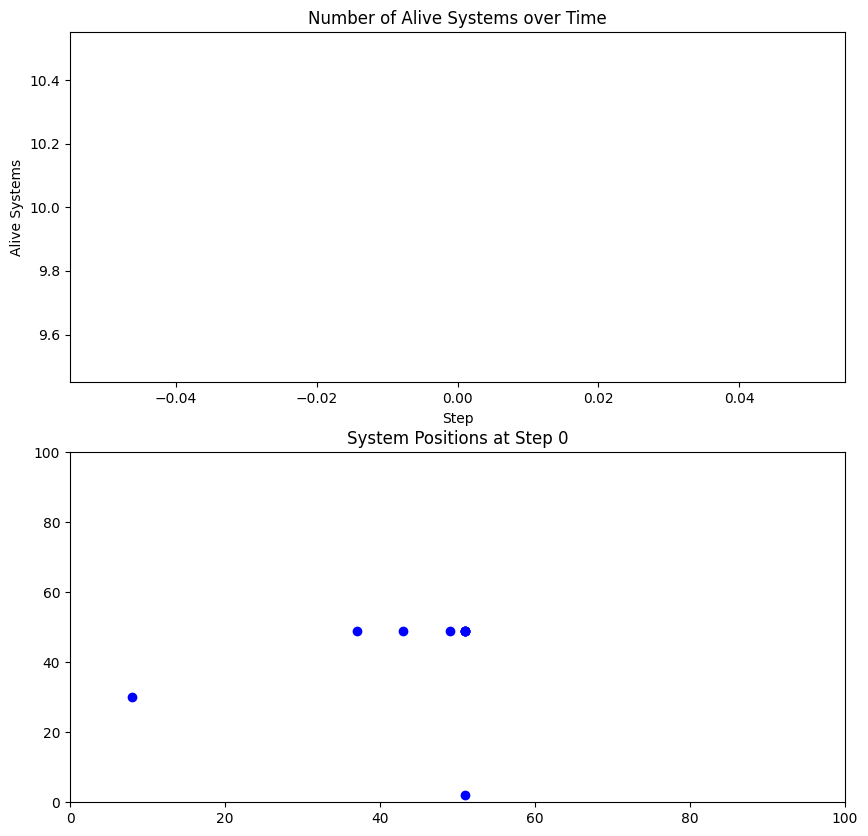

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

class InternalModel:
    def __init__(self):
        self.perceived_energy = 100
        self.perceived_environment = np.zeros((100, 100))

    def update_perception(self, external_info: np.ndarray, energy: float):
        self.perceived_energy = energy
        self.perceived_environment = external_info

    def decide_movement(self) -> Tuple[int, int]:
        # 簡単な意思決定ロジック：知覚された環境で最も高い値を持つ方向に移動
        y, x = np.unravel_index(np.argmax(self.perceived_environment), self.perceived_environment.shape)
        return y - 50, x - 50  # 中心からの相対的な移動

class SelfOrganizingSystem:
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y
        self.energy = 100
        self.internal_model = InternalModel()

    def update(self, environment: np.ndarray):
        # エネルギーの減少
        self.energy -= 0.1

        # 内部モデルの更新
        external_info = environment[max(0, self.y-50):min(100, self.y+50),
                                    max(0, self.x-50):min(100, self.x+50)]
        self.internal_model.update_perception(external_info, self.energy)

        # 移動の決定
        dy, dx = self.internal_model.decide_movement()
        self.x = max(0, min(99, self.x + dx))
        self.y = max(0, min(99, self.y + dy))

    def is_alive(self) -> bool:
        return self.energy > 0

class Environment:
    def __init__(self):
        self.grid = np.zeros((100, 100))
        self.energy_source = (50, 50)

    def update(self):
        # エネルギー源の移動（ランダムウォーク）
        self.energy_source = (
            max(0, min(99, self.energy_source[0] + np.random.randint(-1, 2))),
            max(0, min(99, self.energy_source[1] + np.random.randint(-1, 2)))
        )
        self.grid.fill(0)
        self.grid[self.energy_source] = 100

    def provide_energy(self, system: SelfOrganizingSystem):
        distance = np.sqrt((system.x - self.energy_source[0])**2 + 
                           (system.y - self.energy_source[1])**2)
        if distance < 5:
            system.energy = min(100, system.energy + 10)

def simulate(num_systems: int, num_steps: int):
    environment = Environment()
    systems = [SelfOrganizingSystem(np.random.randint(100), np.random.randint(100)) 
               for _ in range(num_systems)]

    for step in range(num_steps):
        environment.update()
        for system in systems:
            if system.is_alive():
                system.update(environment.grid)
                environment.provide_energy(system)

        # 生存システムの数を記録
        alive_count = sum(1 for system in systems if system.is_alive())
        yield step, alive_count, [(s.x, s.y) for s in systems if s.is_alive()]

# シミュレーションの実行と可視化
num_systems = 10
num_steps = 1000

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

alive_counts = []
positions = []

for step, alive_count, pos in simulate(num_systems, num_steps):
    alive_counts.append(alive_count)
    positions.append(pos)

    if step % 50 == 0:  # 50ステップごとに更新
        ax1.clear()
        ax1.plot(range(step+1), alive_counts)
        ax1.set_xlabel('Step')
        ax1.set_ylabel('Alive Systems')
        ax1.set_title('Number of Alive Systems over Time')

        ax2.clear()
        for p in pos:
            ax2.plot(p[0], p[1], 'bo')
        ax2.set_xlim(0, 100)
        ax2.set_ylim(0, 100)
        ax2.set_title(f'System Positions at Step {step}')

        plt.pause(0.1)

plt.show()